# Image Annotation Techniques in OpenCV

In [1]:
#importing libraries

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#read the image

image = cv.imread('annotation/traffic.jpeg')

## Scaling Images

(<AxesSubplot:title={'center':'Scaled image'}>,
 Text(0.5, 1.0, 'Scaled image'))

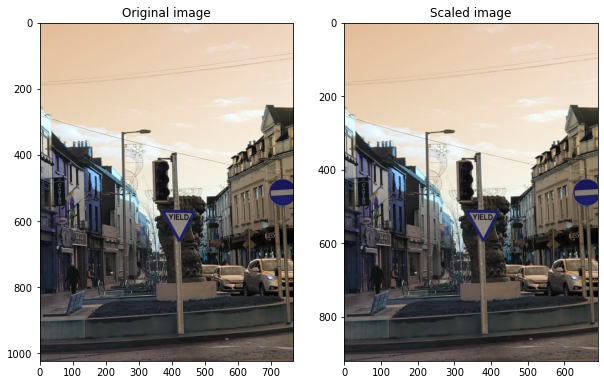

In [6]:
#define percentage for scaling the image (resolution changes)
percentage = 90

#calculate width and height of image according to percentage
width = int(image.shape[1] * percentage/ 100)
height = int(image.shape[0] * percentage/ 100)

#resize the image with defined width and height
image_resize = cv.resize(image, (width, height), interpolation = cv.INTER_AREA)

#view the images
fig = plt.figure(figsize=(10, 8))
plt.subplot(1,2,1), plt.imshow(image), plt.title('Original image')
plt.subplot(1,2,2), plt.imshow(image_resize), plt.title('Scaled image')

## Changing Resolution

In [17]:
#used when capturing image from camera with a resolution
# Note : Only useful when downscaling camera. Upscaling is used only when camera supports.

imag_capture = cv.VideoCapture(0)

def make_1080p():
    cap.set(3, 1920)
    cap.set(4, 1080)

def make_720p():
    cap.set(3, 1280)
    cap.set(4, 720)

def make_480p():
    cap.set(3, 640)
    cap.set(4, 480)

## Color Filtering

In [20]:
# conver the image to hsv
#cvtColor(image, operator): returns the resulting image after applying the specifying operator
rgb_to_hsv = cv.cvtColor(image, cv.COLOR_BGR2HSV)

#define the lower and upper range for red color
lower_yellow = np.array([30,150,50])
upper_yellow = np.array([255,255,180])

#create mask for yellow color using the range for hsv values
mask_for_color = cv.inRange(rgb_to_hsv, lower_yellow, upper_yellow)

# bitwise and of the image and mask
bitwise_result = cv.bitwise_and(image, image, mask= mask_for_color)

(<AxesSubplot:title={'center':'Masked Red color'}>,
 Text(0.5, 1.0, 'Masked Red color'))

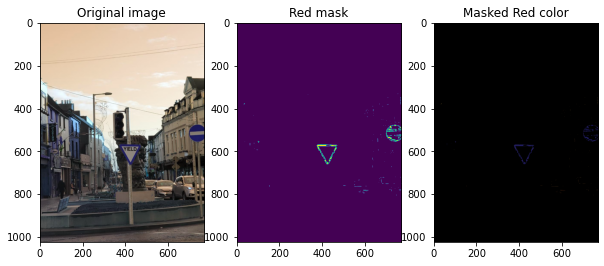

In [23]:
fig = plt.figure(figsize=(10, 8))
plt.subplot(1,3,1), plt.imshow(image), plt.title('Original image')
plt.subplot(1,3,2),plt.imshow(mask_for_color), plt.title('Red mask')
plt.subplot(1,3,3),plt.imshow(bitwise_result), plt.title('Masked Red color')

## Image Annotation

### Code for drawing shapes: Rectangle, Circle, Polygon

In [6]:
# array for storing the co-ordinates of the region of interest

# for rectangle
array_points = []
#for circle
array_circle = []
#three arrays for polygon
current = []
points = []
#boolean to check whether drawing polygon is done
done = False

#boolean value for cropping a region
cropping = False

def draw_rect(event, x, y, flags, param):
    #reference to the global variables
    global array_points, cropping
    #check whether the mouse button is clicked
    if event == cv.EVENT_LBUTTONDOWN:
        array_points = [(x, y)]
        cropping = True
    #check whether the button is released
    elif event == cv.EVENT_LBUTTONUP:
    # if the bbutton is released, note the points of the co-ordinates 
        array_points.append((x, y))
        cropping = False
    # draw rectangle with mouse positions
        cv.rectangle(image, array_points[0], array_points[1], (0, 255, 0), 2)
        cv.imshow("Draw_Rect", image)
        
        
def draw_circle(event, x, y, flags, param):
    #reference to the global variables
    global array_circle, cropping
    #check whether the mouse button is clicked
    if event == cv.EVENT_LBUTTONDOWN:
        array_circle = [(x, y)]
        cropping = False
    # draw circle with mouse positions(here, we require x, y and radius of the circle)
        cv.circle(image, (array_circle[0][0], array_circle[0][1]), 50, (0, 255, 0), 2)
        cv.imshow("Draw_Rect", image)
        
def draw_polygon(event, x, y, flags, param):
    global current, points, done
    #reference to the global variables
    if event == cv.EVENT_MOUSEMOVE:
        current = (x, y)
    elif event == cv.EVENT_LBUTTONDOWN:  
    # if the bbutton is released, note the points of the co-ordinates 
        points.append((x, y))
    elif event == cv.EVENT_RBUTTONDOWN:
    # Right click means we're done
        done = True
    while(not done):
        if (len(points) > 0):
            # draw the polygon with all the points clicked
            cv.polylines(image, np.array([points]), False, (0, 255, 0), 1)
            # show each line being drawn with the co-ordinates
            cv.line(image, points[-1], current, (0, 255, 0))
        cv.imshow("Draw_Rect", image)
        if cv.waitKey(50) == 27: # ESC hit
            done = True

#### Draw and crop rectangle shape

In [6]:
image = cv.imread('annotation/traffic.jpeg')
clone = image.copy()
cv.namedWindow("Draw_Rect")
cv.setMouseCallback("Draw_Rect", draw_rect)

#loop for function of draw and crop
while True:
    cv.imshow("Draw_Rect", image)
    key = cv.waitKey(1) & 0xFF
    if key == ord("r"):
        image = clone.copy()
    elif key == ord("c"):
        break
    elif key == ord("s"):
        roi = clone[array_points[0][1]:array_points[1][1],array_points[0][0]:array_points[1][0]]
        cv.imshow("ROI", roi)
        cv.waitKey(0)
    else:
        continue
        

cv.destroyAllWindows()

#### Draw and crop circle shape

In [ ]:
image = cv.imread('annotation/traffic.jpeg')
clone = image.copy()
cv.namedWindow("Draw_Rect")
cv.setMouseCallback("Draw_Rect", draw_circle)

#loop for function of draw and crop
while True:
    cv.imshow("Draw_Rect", image)
    key = cv.waitKey(1) & 0xFF
    if key == ord("r"):
        image = clone.copy()
    elif key == ord("c"):
        break
    elif key == ord("s"):
        rectX = (array_circle[0][0] - 40) 
        rectY = (array_circle[0][1] - 40)
        roi = clone[rectY:(rectY+2*40), rectX:(rectX+2*40)]
        cv.imshow("ROI", roi)
        cv.waitKey(0)
    else:
        continue
        

cv.destroyAllWindows()

#### Draw and crop polygon shape

In [4]:
image = cv.imread('annotation/traffic.jpeg', -1)
clone = image.copy()
cv.namedWindow("Draw_Rect")
cv.setMouseCallback("Draw_Rect", draw_polygon)

#loop for function of draw and crop
while True:
    cv.imshow("Draw_Rect", image)
    key = cv.waitKey(1) & 0xFF
    if key == ord("r"):
        image = clone.copy()
    elif key == ord("c"):
        break
    elif key == ord("s"):
        mask = np.zeros(image.shape, dtype=np.uint8)
        channel_count = image.shape[2]
        ignore_mask_color = (255,)*channel_count
        cv.fillPoly(mask, np.array([points]), ignore_mask_color)
        masked_image = cv.bitwise_and(image, mask)
        cv.imshow("ROI", masked_image)
        cv.waitKey(0)
    else:
        continue
        

cv.destroyAllWindows()